In [1]:
import math as mt
import fractions as fra
from numpy.linalg import det, inv
import numpy as np
from sympy.abc import *
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from sympy.interactive.printing import init_printing
from matplotlib.animation import PillowWriter
import pandas as pd

import scipy as spy
from scipy.interpolate import interp1d

In [2]:
import scipy.io
mat = scipy.io.loadmat('path.mat')
mat


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Mar  1 16:29:37 2023',
 '__version__': '1.0',
 '__globals__': [],
 'path': array([[ 10.        ,  12.1524237 , 519.34453746, 519.1883468 ,
         464.41610429,  88.3806055 ,  16.37542929,  18.83536248,
         132.37498194, 132.6575145 ,  33.28965236,  29.04661932,
          29.54347865,  37.86197097,  64.42025784,  66.7206172 ,
          79.21853551,  86.27672323,  87.68469033, 100.98804951,
          98.33395   ,  90.02433167,  91.40122874, 107.69310432,
         108.79632199, 125.71771778, 124.44939684, 129.17328994,
         140.65881905, 141.70100934, 141.05342572, 160.62150472,
         397.738583  , 409.42953344, 419.60112001, 420.23634184,
         428.23087479, 380.65523205, 262.36300567, 205.54159575,
         184.90961341, 196.41826315, 201.5387353 , 195.65402342,
         192.70093518, 278.88166874, 353.39514647, 368.7929183 ,
         363.01390339, 347.17773903, 321.09456218, 321.18134356,
        

In [3]:
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'path'])


In [4]:
PS=mat["path"]
px=PS[0]
py=PS[1]

solucion de las ecuaciones de Euler - lagrange para hacer un sistema dinámico


In [5]:
px

array([ 10.        ,  12.1524237 , 519.34453746, 519.1883468 ,
       464.41610429,  88.3806055 ,  16.37542929,  18.83536248,
       132.37498194, 132.6575145 ,  33.28965236,  29.04661932,
        29.54347865,  37.86197097,  64.42025784,  66.7206172 ,
        79.21853551,  86.27672323,  87.68469033, 100.98804951,
        98.33395   ,  90.02433167,  91.40122874, 107.69310432,
       108.79632199, 125.71771778, 124.44939684, 129.17328994,
       140.65881905, 141.70100934, 141.05342572, 160.62150472,
       397.738583  , 409.42953344, 419.60112001, 420.23634184,
       428.23087479, 380.65523205, 262.36300567, 205.54159575,
       184.90961341, 196.41826315, 201.5387353 , 195.65402342,
       192.70093518, 278.88166874, 353.39514647, 368.7929183 ,
       363.01390339, 347.17773903, 321.09456218, 321.18134356,
       329.39299367, 327.13973571, 312.055316  , 275.29604962,
       249.32555484, 238.03211846, 235.0614754 , 280.71244566,
       303.87886044, 307.28205914, 273.96371819, 276.88

In [6]:
py

array([  3.        ,   9.12954878,  10.98388229,  15.65288924,
        24.80350397,  23.78426085,  25.09831239, 549.01803417,
       545.11184417, 538.4486408 , 531.42490483, 527.61942879,
       137.14511022, 127.46224996, 135.41912116, 249.22007692,
       276.69420735, 280.6496381 , 258.7344105 , 242.97003058,
       192.56217459, 166.90389329, 159.10812182, 160.70886977,
       260.18336658, 317.27403251, 373.32479085, 388.50336252,
       378.82047263, 397.16776834, 408.98010773, 419.35567077,
       416.34612407, 427.75374992, 425.55752197, 423.71911725,
       168.50340329, 160.90289043, 158.06865689, 168.1029526 ,
       182.02505037, 182.3344912 , 201.34246889, 201.86974685,
       365.70374141, 371.72911016, 370.0739816 , 362.06760348,
       203.56298074, 193.82680144, 199.27275869, 205.4106332 ,
       237.73151395, 330.08436259, 337.36013625, 331.65044364,
       323.01517055, 324.14313248, 240.45044502, 255.64549309,
       259.32774183, 309.71309259, 310.28348902, 299.83

In [7]:
interf=spy.interpolate.interp1d(px, py, kind='linear')


Text(0, 0.5, 'm')

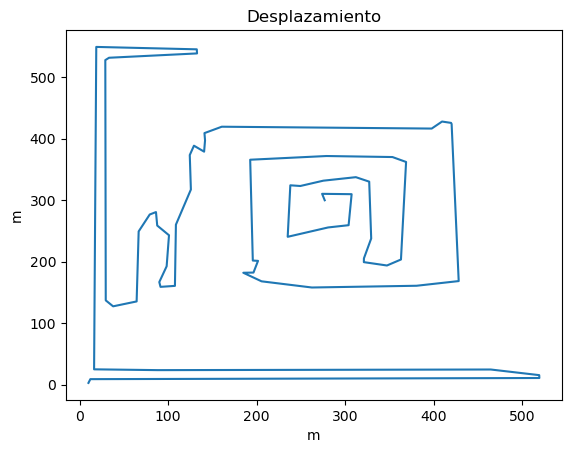

In [8]:
a=plt.plot(px,py)
plt.title("Desplazamiento")
plt.xlabel("m")
plt.ylabel("m")

In [9]:

m=0
e=0
erx=[px[0]]
for i in range (63) : 
    e=-px[m+1]+px[63]
    erx=np.append(erx,e)
    m=m+1
t=np.linspace(0,100,64)
t
erx

array([  10.        ,  264.7345763 , -242.45753746, -242.3013468 ,
       -187.52910429,  188.5063945 ,  260.51157071,  258.05163752,
        144.51201806,  144.2294855 ,  243.59734764,  247.84038068,
        247.34352135,  239.02502903,  212.46674216,  210.1663828 ,
        197.66846449,  190.61027677,  189.20230967,  175.89895049,
        178.55305   ,  186.86266833,  185.48577126,  169.19389568,
        168.09067801,  151.16928222,  152.43760316,  147.71371006,
        136.22818095,  135.18599066,  135.83357428,  116.26549528,
       -120.851583  , -132.54253344, -142.71412001, -143.34934184,
       -151.34387479, -103.76823205,   14.52399433,   71.34540425,
         91.97738659,   80.46873685,   75.3482647 ,   81.23297658,
         84.18606482,   -1.99466874,  -76.50814647,  -91.9059183 ,
        -86.12690339,  -70.29073903,  -44.20756218,  -44.29434356,
        -52.50599367,  -50.25273571,  -35.168316  ,    1.59095038,
         27.56144516,   38.85488154,   41.8255246 ,   -3.82544

In [10]:
m=0
e=0
ery=[py[0]]
for i in range (63) : 
    e=-py[m+1]+py[63]
    ery=np.append(ery,e)
    m=m+1

ery

array([   3.        ,  290.70945122,  288.85511771,  284.18611076,
        275.03549603,  276.05473915,  274.74068761, -249.17903417,
       -245.27284417, -238.6096408 , -231.58590483, -227.78042879,
        162.69388978,  172.37675004,  164.41987884,   50.61892308,
         23.14479265,   19.1893619 ,   41.1045895 ,   56.86896942,
        107.27682541,  132.93510671,  140.73087818,  139.13013023,
         39.65563342,  -17.43503251,  -73.48579085,  -88.66436252,
        -78.98147263,  -97.32876834, -109.14110773, -119.51667077,
       -116.50712407, -127.91474992, -125.71852197, -123.88011725,
        131.33559671,  138.93610957,  141.77034311,  131.7360474 ,
        117.81394963,  117.5045088 ,   98.49653111,   97.96925315,
        -65.86474141,  -71.89011016,  -70.2349816 ,  -62.22860348,
         96.27601926,  106.01219856,  100.56624131,   94.4283668 ,
         62.10748605,  -30.24536259,  -37.52113625,  -31.81144364,
        -23.17617055,  -24.30413248,   59.38855498,   44.19350

In [11]:
len(ery)

64

Text(0.5, 1.0, 'Error x')

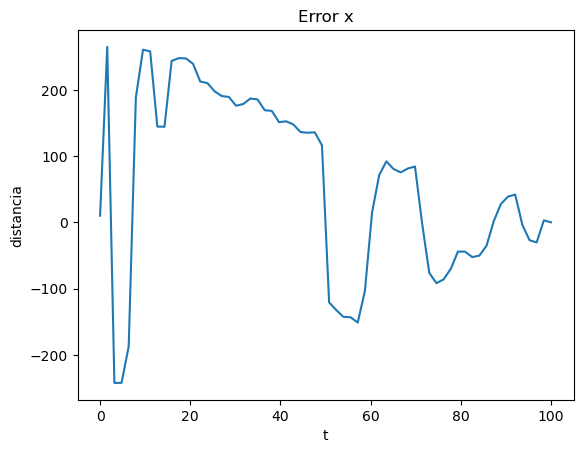

In [12]:
plt.plot(t,erx)
plt.ylabel("distancia")
plt.xlabel("t")
plt.title("Error x")

Text(0.5, 1.0, 'Error y')

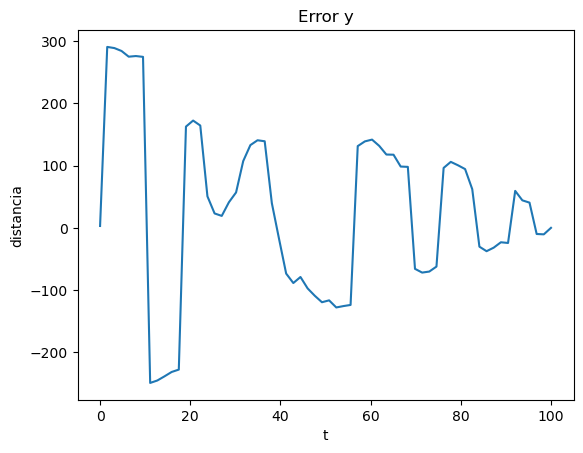

In [13]:
plt.plot(t,ery)
plt.ylabel("distancia")
plt.xlabel("t")
plt.title("Error y")

In [14]:
m=0
e=0
ert=[np.arctan(ery[0]/erx[0])]
for i in range (63) : 
    e=(-np.arctan(ery[m+1]/erx[m+1])+np.arctan(ery[62]/erx[62]))
    ert=np.append(ert,e)
    m=m+1
len(ert)

C:\Users\jatar\AppData\Local\Temp\ipykernel_18116\1993679222.py:5: RuntimeWarning: invalid value encountered in double_scalars
  e=(-np.arctan(ery[m+1]/erx[m+1])+np.arctan(ery[62]/erx[62]))


64

In [15]:
kp=.0001
ux=px[63]+kp*erx
ux

array([276.888     , 276.91347346, 276.86275425, 276.86276987,
       276.86824709, 276.90585064, 276.91305116, 276.91280516,
       276.9014512 , 276.90142295, 276.91135973, 276.91178404,
       276.91173435, 276.9109025 , 276.90824667, 276.90801664,
       276.90676685, 276.90606103, 276.90592023, 276.9045899 ,
       276.90485531, 276.90568627, 276.90554858, 276.90391939,
       276.90380907, 276.90211693, 276.90224376, 276.90177137,
       276.90062282, 276.9005186 , 276.90058336, 276.89862655,
       276.87491484, 276.87374575, 276.87272859, 276.87266507,
       276.87186561, 276.87662318, 276.8884524 , 276.89413454,
       276.89619774, 276.89504687, 276.89453483, 276.8951233 ,
       276.89541861, 276.88680053, 276.87934919, 276.87780941,
       276.87838731, 276.87997093, 276.88257924, 276.88257057,
       276.8817494 , 276.88197473, 276.88348317, 276.8871591 ,
       276.88975614, 276.89088549, 276.89118255, 276.88661746,
       276.88430081, 276.88396049, 276.88729233, 276.88

In [16]:
uy=py[63]+kp*ery
uy

array([299.8393    , 299.86807095, 299.86788551, 299.86741861,
       299.86650355, 299.86660547, 299.86647407, 299.8140821 ,
       299.81447272, 299.81513904, 299.81584141, 299.81622196,
       299.85526939, 299.85623768, 299.85544199, 299.84406189,
       299.84131448, 299.84091894, 299.84311046, 299.8446869 ,
       299.84972768, 299.85229351, 299.85307309, 299.85291301,
       299.84296556, 299.8372565 , 299.83165142, 299.83013356,
       299.83110185, 299.82926712, 299.82808589, 299.82704833,
       299.82734929, 299.82620853, 299.82642815, 299.82661199,
       299.85213356, 299.85289361, 299.85317703, 299.8521736 ,
       299.85078139, 299.85075045, 299.84884965, 299.84879693,
       299.83241353, 299.83181099, 299.8319765 , 299.83277714,
       299.8486276 , 299.84960122, 299.84905662, 299.84844284,
       299.84521075, 299.83597546, 299.83524789, 299.83581886,
       299.83668238, 299.83656959, 299.84493886, 299.84341935,
       299.84305113, 299.83801259, 299.83795555, 299.83

In [17]:
ut=np.arctan(py[63]/px[63])+kp*ert
ut

array([0.82520338, 0.82496123, 0.8251317 , 0.82513092, 0.82514168,
       0.82494728, 0.82496325, 0.82512124, 0.82514828, 0.82514716,
       0.82512046, 0.82511877, 0.82498626, 0.82498197, 0.82497859,
       0.82502081, 0.82503279, 0.82503441, 0.82502305, 0.82501318,
       0.82499034, 0.82498261, 0.82497954, 0.82497563, 0.82502128,
       0.82505593, 0.82508937, 0.82509851, 0.82509699, 0.82510685,
       0.82511213, 0.82512436, 0.82496774, 0.82496768, 0.82497223,
       0.82497318, 0.82511592, 0.82513737, 0.82489757, 0.824937  ,
       0.82495365, 0.82494741, 0.82495267, 0.82495659, 0.82511084,
       0.82489014, 0.82497018, 0.82498493, 0.82512854, 0.82514298,
       0.82516011, 0.82515766, 0.82513134, 0.82499027, 0.82496267,
       0.82519653, 0.82511436, 0.82510034, 0.82494872, 0.82519289,
       0.82514275, 0.82501303, 0.82517423,        nan])

Text(0.5, 1.0, 'Error ángulo')

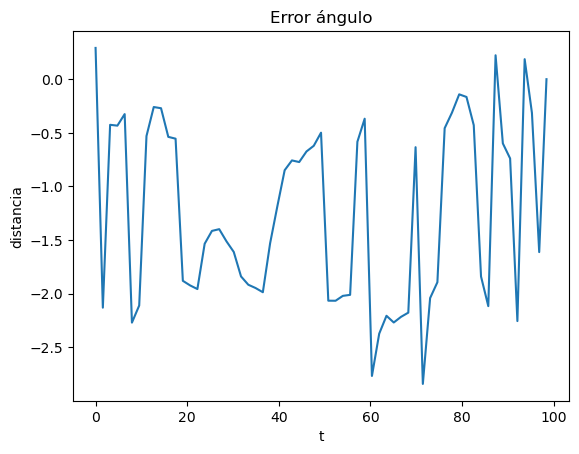

In [18]:
plt.plot(t,ert)
plt.ylabel("distancia")
plt.xlabel("t")
plt.title("Error ángulo")

Text(0.5, 1.0, 'Error x')

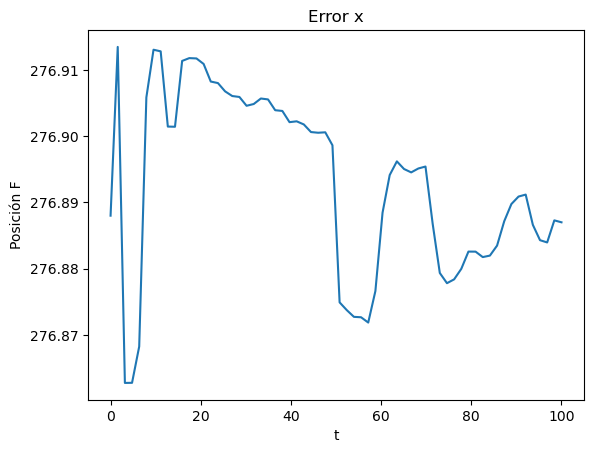

In [19]:
plt.plot(t,ux)
plt.ylabel("Posición F")
plt.xlabel("t")
plt.title("Error x")

Text(0.5, 1.0, 'Error y')

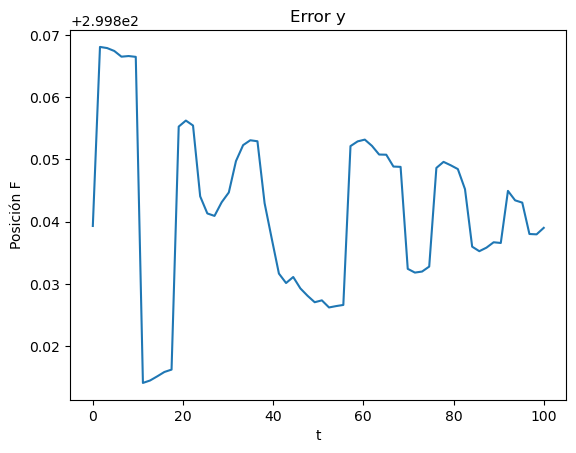

In [20]:
plt.plot(t,uy)
plt.ylabel("Posición F")
plt.xlabel("t")
plt.title("Error y")

Text(0.5, 1.0, 'Error theta')

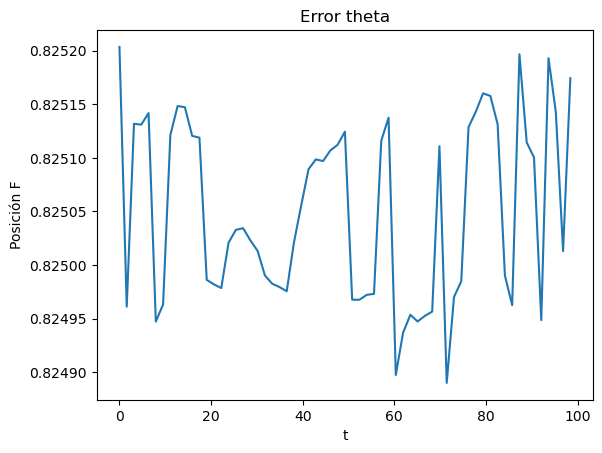

In [21]:
plt.plot(t,ut)
plt.ylabel("Posición F")
plt.xlabel("t")
plt.title("Error theta")

Text(0.5, 1.0, 'Error x')

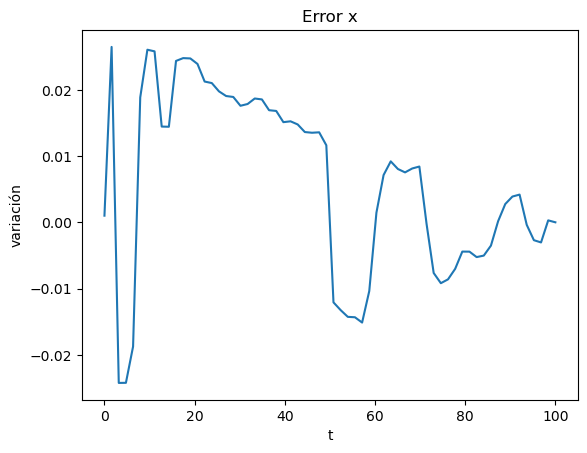

In [22]:
plt.plot(t,ux-px[63])
plt.ylabel("variación")
plt.xlabel("t")
plt.title("Error x")

Text(0.5, 1.0, 'Error y')

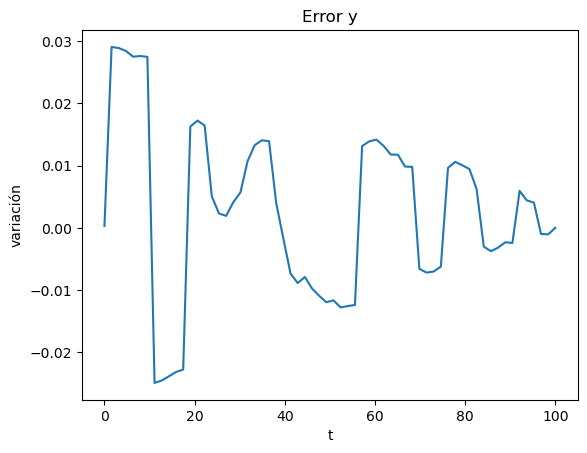

In [23]:
plt.plot(t,uy-py[63])
plt.ylabel("variación")
plt.xlabel("t")
plt.title("Error y")

Text(0.5, 1.0, 'Error theta')

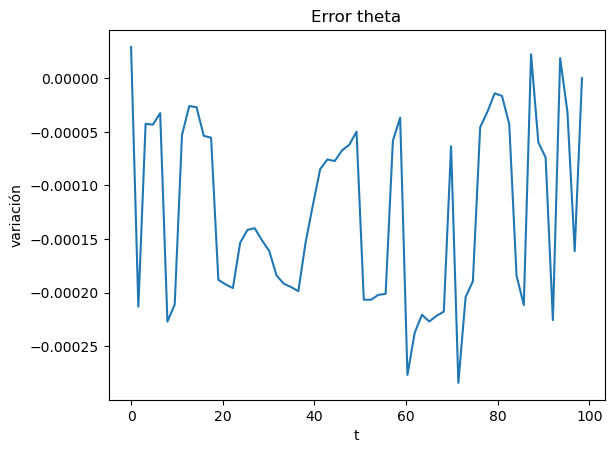

In [24]:
plt.plot(t,ut-np.arctan(py[63]/px[63]))
plt.ylabel("variación")
plt.xlabel("t")
plt.title("Error theta")

In [25]:
from vpython import *


<IPython.core.display.Javascript object>

In [26]:
z=.30
h = arange(0, 10, 0.1)
base  = box(color = color.white,pos=vector(280,0,280),axis=vector(0,0,0),
            size=vector(560,0.5,560),texture='beta2.jpg' )
scene.camera.follow(base)

running = True

def Run(b):
    global running
    running = not running
    if running: b.text = "Pause"
    else: b.text = "Run"
rod1 = cylinder(color=color.green,pos=vector(px[0],0,py[0]),axis=vector(0,-1,0), radius=8)
rod2 = cylinder(color=color.blue,pos=vector(px[0],0,py[0]),axis=vector(0,.31,0), radius=.0000001,make_trail=True)

print('Start')
i = 0

for i in range (64) :
    rate(3)
    
    
    rod2.pos = vector(px[i], 0, py[i])
    i = i + 1
i=0
while True:
    rate(2)
    rod1.pos = vector(px[i], 0, py[i])
    i = i + 1



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Start


IndexError: index 64 is out of bounds for axis 0 with size 64